# Visualização de características

In [1]:
from datetime import datetime
from os import listdir
from os.path import isfile, join

import os
import random

import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import concurrent.futures

from osgeo import gdal
import rasterio # the GEOS-based raster package
from rasterio import plot as rioplot
import numpy # the array computation library
import geopandas # the GEOS-based vector package
from libtiff import TIFF
from cv2 import *

In [2]:
%matplotlib inline

In [3]:
def print_histogram(im):
    plt.hist(im, bins='auto')  
    plt.title("Histogram")
    plt.show()
    plt.close()

In [4]:
def plot_band(im):
    plt.pcolormesh(im)
    plt.axis('equal')
    plt.colorbar()
    plt.show()
    plt.close()

In [5]:
from util import *

In [6]:
DATASET = 'b2s'  # b2s ou bfs
TYPE = "multiespectral"

## Metadados

In [7]:
dfs = dict()
for f in os.listdir("data"):
    if os.path.splitext(f)[-1] == '.csv':
        dfs[f] = pd.read_csv(os.path.join("data", f))
        
frames = []
for k in dfs:
    if DATASET in k and TYPE in k:
        frames.append(dfs[k])
metadata = pd.concat(frames)

In [8]:
for key in ['B1File', 'B2File', 'B3File', 'B4File']:
    metadata[key] = metadata.apply(lambda x: os.path.join('data', 'RAW', x['Crop'], x[key]), axis=1)

In [9]:
metadata['Name'] = metadata.apply(lambda x: f'{(x.Name.split("_")[0])}_{int(x.Name.split("_")[1]):03}', axis=1)

In [10]:
metadata['Instance'] = metadata.apply(lambda x: f'{x.Name}_{x.Crop}', axis=1)

In [11]:
metadata.head(3)

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield
0,fung_019_crop_tsc_2017_b2s,crop_tsc_2017_b2s,data/RAW/crop_tsc_2017_b2s/q170505tscrfl_fung_...,data/RAW/crop_tsc_2017_b2s/q170505tscrfl_fung_...,data/RAW/crop_tsc_2017_b2s/q170505tscrfl_fung_...,data/RAW/crop_tsc_2017_b2s/q170505tscrfl_fung_...,fung_019,1,4,19,17,Fungicide,1.0,6.055209
1,fung_031_crop_tsc_2017_b2s,crop_tsc_2017_b2s,data/RAW/crop_tsc_2017_b2s/q170505tscrfl_fung_...,data/RAW/crop_tsc_2017_b2s/q170505tscrfl_fung_...,data/RAW/crop_tsc_2017_b2s/q170505tscrfl_fung_...,data/RAW/crop_tsc_2017_b2s/q170505tscrfl_fung_...,fung_031,2,7,31,19,Fungicide,1.0,4.081627
2,fung_059_crop_tsc_2017_b2s,crop_tsc_2017_b2s,data/RAW/crop_tsc_2017_b2s/q170419tscrfl_fung_...,data/RAW/crop_tsc_2017_b2s/q170419tscrfl_fung_...,data/RAW/crop_tsc_2017_b2s/q170419tscrfl_fung_...,data/RAW/crop_tsc_2017_b2s/q170419tscrfl_fung_...,fung_059,3,12,59,10,Fungicide,1.0,4.612393


In [12]:
sample = metadata.sample(1)
sample

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield
411,fung_051_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160511tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160511tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160511tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160511tscrfl_fung_...,fung_051,3,11,51,20,Fungicide,1.0,3.295471


(53, 53, 4)


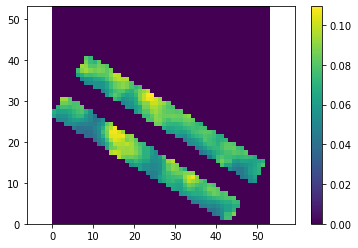

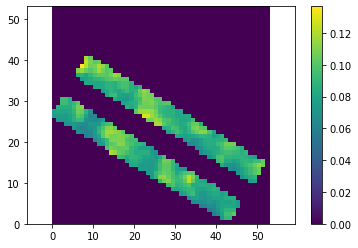

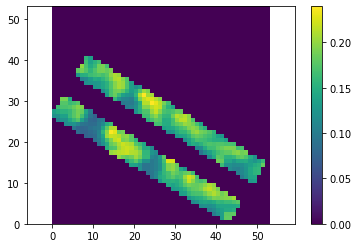

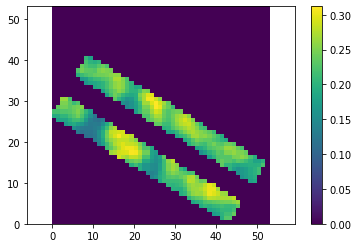

In [13]:
# , im_shape=IM_SHAPE
im = process(sample)
print(im[1][0].shape)
for c in range(im[1][0].shape[-1]):
    plot_band(im[1][0][:,:,c])

## NVDI

/home/lucas/Documentos/prod-milho/util.py:261: RuntimeWarning: invalid value encountered in true_divide
  im = (im[:,:,3]-im[:,:,1]) / (im[:,:,3]+im[:,:,1])


(53, 53, 1)


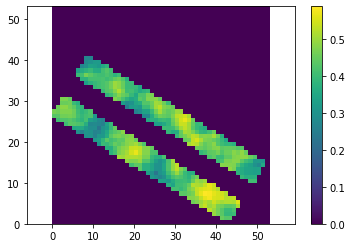

In [14]:
im = process(sample, transform_f=ndvi)
print(im[1][0].shape)
plot_band(im[1][0][:,:,0])

## RVDI

/home/lucas/Documentos/prod-milho/util.py:265: RuntimeWarning: invalid value encountered in true_divide
  im = (im[:,:,3]-im[:,:,1]) / (im[:,:,3]+im[:,:,1])**(1/2)


(53, 53, 1)


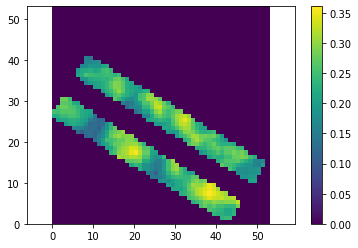

In [15]:
im = process(sample, transform_f=rdvi)
print(im[1][0].shape)
plot_band(im[1][0][:,:,0])

## OSAVI

(53, 53, 1)


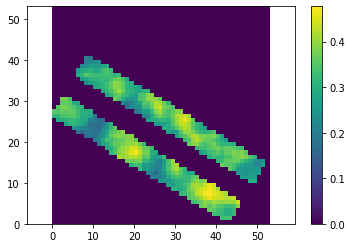

In [16]:
im = process(sample, transform_f=osavi)
print(im[1][0].shape)
plot_band(im[1][0][:,:,0])

## MSR

/home/lucas/Documentos/prod-milho/util.py:273: RuntimeWarning: invalid value encountered in true_divide
  im = (im[:,:,3]/im[:,:,1]) - 1/((im[:,:,3]/im[:,:,1])**(1/2)) + 1


(53, 53, 1)


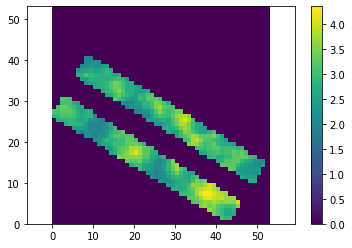

In [17]:
im = process(sample, transform_f=msr)
print(im[1][0].shape)
plot_band(im[1][0][:,:,0])

## MCARI 1

/home/lucas/Documentos/prod-milho/util.py:277: RuntimeWarning: invalid value encountered in true_divide
  im = 1.2*(2.5*((im[:,:,3] - im[:,:,1])) - 1.3*(im[:,:,3]/im[:,:,0]))


(53, 53, 1)


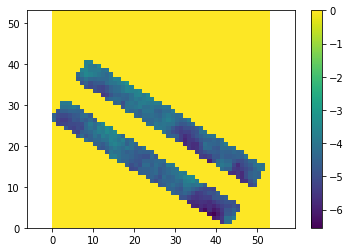

In [18]:
im = process(sample, transform_f=mcari1)
print(im[1][0].shape)
plot_band(im[1][0][:,:,0])

## MCARI 2

/home/lucas/Documentos/prod-milho/util.py:281: RuntimeWarning: invalid value encountered in true_divide
  m1 = 1.2*(2.5*((im[:,:,3] - im[:,:,1])) - 1.3*(im[:,:,3]/im[:,:,0]))


(53, 53, 1)


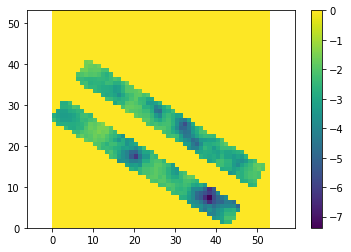

In [19]:
im = process(sample, transform_f=mcari2)
print(im[1][0].shape)
plot_band(im[1][0][:,:,0])

## PSSRA

/home/lucas/Documentos/prod-milho/util.py:286: RuntimeWarning: invalid value encountered in true_divide
  im = im[:,:,3]/im[:,:,1]


(53, 53, 1)


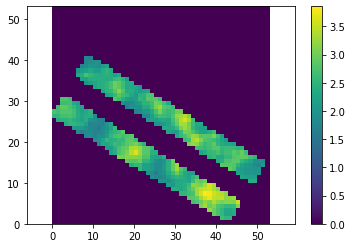

In [20]:
im = process(sample, transform_f=pssra)
print(im[1][0].shape)
plot_band(im[1][0][:,:,0])

## RGB RATIO

/home/lucas/Documentos/prod-milho/util.py:290: RuntimeWarning: invalid value encountered in true_divide
  im = im[:,:,3]/im[:,:,1]


(53, 53, 1)


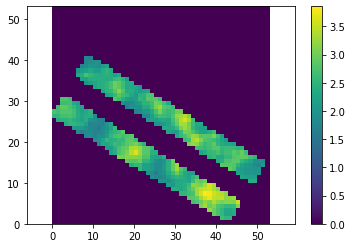

In [21]:
im = process(sample, transform_f=g_rgb_ratio)
print(im[1][0].shape)
plot_band(im[1][0][:,:,0])